In [3]:
import pandas as pd
from pathlib import Path
import hvplot.pandas 
import matplotlib.pyplot as plt 

customer_segmentation_data = "customer_segmentation_data.csv"

cs_df = pd.read_csv(customer_segmentation_data)

cs_df = pd.DataFrame(cs_df)

cs_df


,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


# Relationship Comparison: Marital Status vs. Policy type

In [23]:
policy_by_marital = cs_df.groupby(["Marital Status", "Policy Type"]).size().reset_index(name='Totals')
policy_by_marital

,Marital Status,Policy Type,Totals
0,Divorced,Business,3352
1,Divorced,Family,2918
2,Divorced,Group,4651
3,Divorced,Individual,2230
4,Married,Business,3536
5,Married,Family,3071
6,Married,Group,4558
7,Married,Individual,2054
8,Separated,Business,2482
9,Separated,Family,2095


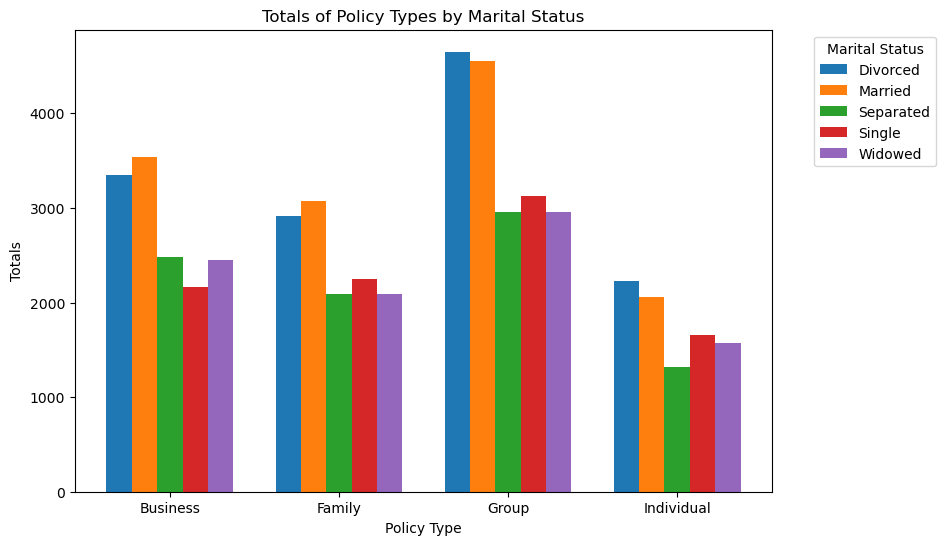

In [1]:
import matplotlib.pyplot as plt

marital_status = ["Divorced", "Married", "Separated", "Single", "Widowed"]
policy_types = ["Business", "Family", "Group", "Individual"]
totals = [
    [3352, 2918, 4651, 2230],
    [3536, 3071, 4558, 2054],
    [2482, 2095, 2962, 1322],
    [2166, 2251, 3122, 1656],
    [2450, 2089, 2962, 1576]
]

fig, ax = plt.subplots(figsize=(9, 6))
bar_width = 0.15

for i, (mstatus, data) in enumerate(zip(marital_status, totals)):
    x = range(len(data))
    ax.bar([pos + i * bar_width for pos in x], data, width=bar_width, label=mstatus)

ax.set_xticks([pos + bar_width * 2 for pos in range(len(policy_types))])
ax.set_xticklabels(policy_types)
ax.set_xlabel('Policy Type')
ax.set_ylabel('Totals')
ax.set_title('Totals of Policy Types by Marital Status')
ax.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

